In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.impute import SimpleImputer     
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df_train = pd.read_csv('../project_data/train.csv', keep_default_na=False, na_values='')
df_test = pd.read_csv('../project_data/test.csv', keep_default_na=False, na_values='')

In [3]:
df_train.columns = df_train.columns.str.replace(' ','_').str.lower()
df_test.columns = df_test.columns.str.replace(' ','_').str.lower()

<br>

### Data Cleaning and EDA

In [4]:
df_train.shape, df_test.shape

((2051, 81), (878, 80))

In [5]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [6]:
df_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [8]:
#columns with the following ratings: Ex, Gd, TA, Fa, Po, and maybe NA

column_list = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc','kitchen_qual','fireplace_qu','garage_qual','pool_qc']

In [9]:
#function to add 0 to NA
def ex_gd_etc(df, column_list):
    for column in column_list:
        df[column] = df[column].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

In [10]:
ex_gd_etc(df_train, column_list)
ex_gd_etc(df_test, column_list)

In [11]:
df_train['lot_shape'].map({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
df_train['utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df_train['land_slope'].map({'Gtl':2, 'Mod':1, 'Sev':0})
df_train['bsmt_exposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
df_train['bsmtfin_type_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_train['bsmtfin_type_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_train['electrical'].map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':2})
df_train['functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_train['garage_finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
df_train['paved_drive'].map({'Y':2, 'P':1, 'N':0})
df_train['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0});

In [12]:
df_test['lot_shape'].map({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
df_test['utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df_test['land_slope'].map({'Gtl':2, 'Mod':1, 'Sev':0})
df_test['bsmt_exposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
df_test['bsmtfin_type_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['bsmtfin_type_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['electrical'].map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':2})
df_test['functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_test['garage_finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
df_test['paved_drive'].map({'Y':2, 'P':1, 'N':0})
df_test['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0});

In [13]:
df_train.isnull().sum().sum();

In [14]:
df_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

lot_frontage      330
garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_exposure       4
bsmtfin_type_2      2
bsmt_full_bath      2
bsmt_half_bath      2
garage_cond         1
bsmt_qual           1
garage_finish       1
garage_cars         1
garage_area         1
garage_qual         1
total_bsmt_sf       1
bsmtfin_type_1      1
bsmt_cond           1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
dtype: int64

In [15]:
df_train.shape

(2051, 81)

In [16]:
df_test.shape

(878, 80)

In [17]:
df_train = df_train.drop(columns=['lot_frontage','garage_yr_blt']);
#for now, removing these columns due to amount of nulls
df_test = df_test.drop(columns=['lot_frontage','garage_yr_blt'])
df_train.drop(df_train[df_train.gr_liv_area >= 4000].index, inplace=True)

In [18]:
df_train = df_train.dropna()
#removing rows with nulls because there are only 29 left with nulls

In [19]:
df_train.isnull().sum().sum()

0

In [20]:
df_train.shape

(2020, 79)

In [21]:
df_test.shape

(878, 78)

[Text(0.5, 1.0, 'Sale Prices')]

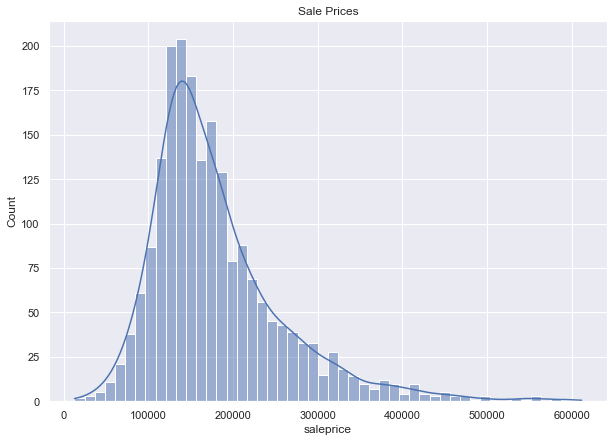

In [22]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.histplot(data=df_train, x='saleprice', kde=True, bins=50).set(title='Sale Prices')

In [23]:
df_train.shape

(2020, 79)

In [24]:
df_test.shape

(878, 78)

[Text(0.5, 1.0, 'Sale Prices')]

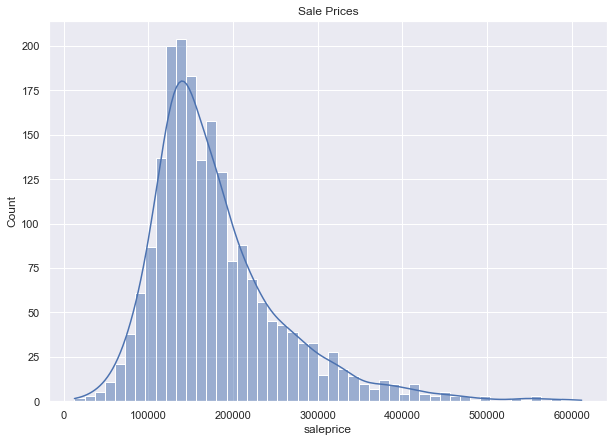

In [25]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.histplot(data=df_train, x='saleprice', kde=True, bins=50).set(title='Sale Prices')

In [26]:
df_train.corr().saleprice.sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.803514
gr_liv_area        0.722081
exter_qual         0.714685
kitchen_qual       0.692900
total_bsmt_sf      0.670084
1st_flr_sf         0.654955
garage_area        0.653647
garage_cars        0.647134
bsmt_qual          0.616083
year_built         0.572137
year_remod/add     0.549573
full_bath          0.538901
fireplace_qu       0.537753
mas_vnr_area       0.520235
totrms_abvgrd      0.511058
fireplaces         0.473982
heating_qc         0.458245
bsmtfin_sf_1       0.447272
open_porch_sf      0.331803
wood_deck_sf       0.330638
lot_area           0.303246
bsmt_full_bath     0.285711
garage_qual        0.285313
half_bath          0.279937
2nd_flr_sf         0.252081
bsmt_cond          0.224575
bsmt_unf_sf        0.189719
bedroom_abvgr      0.138619
screen_porch       0.138200
3ssn_porch         0.050002
exter_cond         0.038648
pool_qc            0.034742
pool_area          0.026527
mo_sold            0.025290
bsmtfin_sf_2       0

In [27]:
df_train['all_sf'] = df_train['total_bsmt_sf'] + df_train['gr_liv_area']
df_train['all_bath'] = df_train['bsmt_full_bath'] + .5 * df_train['bsmt_half_bath'] + df_train['full_bath'] + .5 * df_train['half_bath']

df_test['all_sf'] = df_test['total_bsmt_sf'] + df_test['gr_liv_area']
df_test['all_bath'] = df_test['bsmt_full_bath'] + .5 * df_test['bsmt_half_bath'] + df_test['full_bath'] + .5 * df_test['half_bath']

In [28]:
df_train.corr().saleprice.sort_values(ascending=False)

saleprice          1.000000
all_sf             0.827179
overall_qual       0.803514
gr_liv_area        0.722081
exter_qual         0.714685
kitchen_qual       0.692900
total_bsmt_sf      0.670084
1st_flr_sf         0.654955
garage_area        0.653647
garage_cars        0.647134
all_bath           0.631965
bsmt_qual          0.616083
year_built         0.572137
year_remod/add     0.549573
full_bath          0.538901
fireplace_qu       0.537753
mas_vnr_area       0.520235
totrms_abvgrd      0.511058
fireplaces         0.473982
heating_qc         0.458245
bsmtfin_sf_1       0.447272
open_porch_sf      0.331803
wood_deck_sf       0.330638
lot_area           0.303246
bsmt_full_bath     0.285711
garage_qual        0.285313
half_bath          0.279937
2nd_flr_sf         0.252081
bsmt_cond          0.224575
bsmt_unf_sf        0.189719
bedroom_abvgr      0.138619
screen_porch       0.138200
3ssn_porch         0.050002
exter_cond         0.038648
pool_qc            0.034742
pool_area          0

<AxesSubplot:>

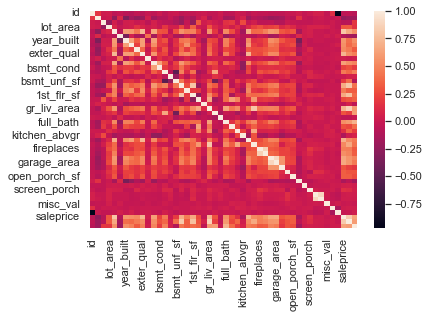

In [29]:
sns.heatmap(df_train.corr())

[Text(0.5, 1.0, 'Sale Price by Overall Quality')]

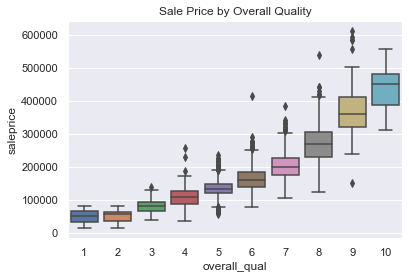

In [30]:
#1

sns.boxplot(data=df_train, x="overall_qual", y='saleprice').set(title='Sale Price by Overall Quality')

[Text(0.5, 1.0, 'Sale Price by Ground Living Area')]

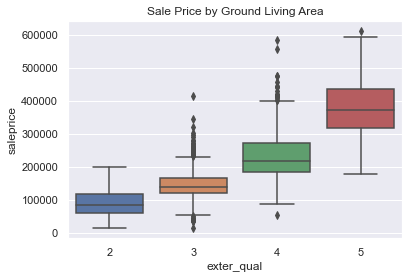

In [31]:
#2

sns.boxplot(data=df_train, x="exter_qual", y='saleprice').set(title='Sale Price by Ground Living Area')

[Text(0.5, 1.0, 'Sale Price by Ground Living Area')]

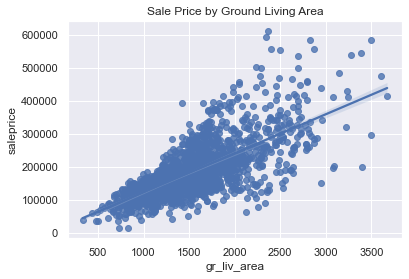

In [32]:
#3

sns.regplot(data=df_train, x="gr_liv_area", y='saleprice').set(title='Sale Price by Ground Living Area')

[Text(0.5, 1.0, 'Sale Price by Year Remodeled')]

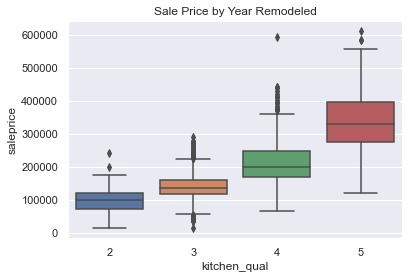

In [33]:
#4

sns.boxplot(data=df_train, x="kitchen_qual", y='saleprice').set(title='Sale Price by Year Remodeled')

[Text(0.5, 1.0, 'Sale Price by Total Basement Square Footage')]

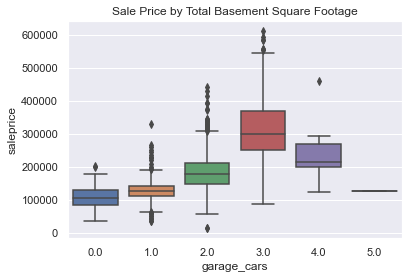

In [34]:
#5

sns.boxplot(data=df_train, x="garage_cars", y='saleprice').set(title='Sale Price by Total Basement Square Footage')

In [35]:
df_train.shape

(2020, 81)

In [36]:
df_test.shape

(878, 80)

<br>

### Preprocessing and Modelling

----

----

In [37]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [38]:
numeric = [col for col in df_train._get_numeric_data().columns if col not in ['id', 'pid', 'saleprice']]


In [39]:
categorical = [col for col in df_train.columns if col not in numeric and col not in ['id', 'pid', 'saleprice']]


In [40]:
ctx = ColumnTransformer(
    [('ss', StandardScaler(), numeric),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
])

In [41]:
ridge_pipe = Pipeline([
    ('ct', ctx),
    ('rg', Ridge())
])

ridge_pipe_params = {
    'ct__remainder' : ['passthrough'],
    'ct__ss__with_mean' : [True, False],
    'rg__alpha' : [0.1, 1, 10, 100]
}

In [42]:
gs_ridge = GridSearchCV(
    ridge_pipe,
    ridge_pipe_params,
    cv = 5,
    verbose = 2,
    error_score = 'raise'
)

In [43]:
df_train['saleprice'] = np.log(df_train['saleprice'])

In [44]:
X = df_train.drop(columns = ['id', 'pid', 'saleprice'])
y = df_train['saleprice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state = 42)

In [45]:
gs_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=0.1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=0.1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=0.1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=0.1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=0.1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=1; total time=   0.0s
[CV] END ct__remainder=passthrough, ct__ss__with_mean=True, rg__alpha=1; total time=   0.0s
[CV] END c

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ss',
                                                                         StandardScaler(),
                                                                         ['ms_subclass',
                                                                          'lot_area',
                                                                          'overall_qual',
                                                                          'overall_cond',
                                                                          'year_built',
                                                                          'year_remod/add',
                                                                          'mas_vnr_area',
                                                                          'exter_qual',
                               

In [46]:
gs_ridge.best_score_

0.9048717439493762

In [47]:
gs_ridge.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['ms_subclass', 'lot_area',
                                                   'overall_qual',
                                                   'overall_cond', 'year_built',
                                                   'year_remod/add',
                                                   'mas_vnr_area', 'exter_qual',
                                                   'exter_cond', 'bsmt_qual',
                                                   'bsmt_cond', 'bsmtfin_sf_1',
                                                   'bsmtfin_sf_2',
                                                   'bsmt_unf_sf',
                                                   'total_bsmt_sf',
                                                   'heating_qc', '1st_flr_sf',
                             

In [48]:
gs_ridge.score(X_val, y_val)

0.9051526875292532

In [49]:
gs_ridge.best_params_

{'ct__remainder': 'passthrough', 'ct__ss__with_mean': True, 'rg__alpha': 100}

In [50]:
test_id = df_test['id']

In [51]:
preds = gs_ridge.predict(df_test)

In [52]:
gs_ridge.best_params_

{'ct__remainder': 'passthrough', 'ct__ss__with_mean': True, 'rg__alpha': 100}

In [53]:
preds = gs_ridge.predict(df_test)

In [54]:
preds = pd.DataFrame(preds, columns = ['salePrice'])

In [55]:
preds

,salePrice
0,11.660209
1,12.040348
2,12.281269
3,11.585419
4,12.071602
...,...
873,12.116279
874,12.317350
875,11.765968
876,11.660624


In [56]:
preds.insert(loc = 0, column = 'Id', value = test_id)

In [57]:
preds.shape


(878, 2)